<h1> Imports </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<h1> Build synthetic dataset that matches a linear pattern</h1>

In [2]:
# Dataset parameters
# np.random.seed(42)
num_samples = 100
degree = 2 # y = a*X^2 + b*X + c
a = 1
b = 3
c = -2
x_min = -10
x_max = 20
random_scale = 10 # The higher this parameter, the higher the variability, the worse a regression model will predict (R-squared will decrease)

# Build dataset (X, y)
X = np.linspace(x_min, x_max, num_samples)
y_ideal = a*X**2 + b*X + c
y = y_ideal + np.random.normal(scale=random_scale, size=num_samples)  # Polynomial with noise to add variability

df = pd.DataFrame({'X': X, 'y': y})
df

,X,y
0,-10.000000,72.977286
1,-9.696970,48.338709
2,-9.393939,45.626002
3,-9.090909,58.003778
4,-8.787879,46.152248
...,...,...
95,18.787879,402.052958
96,19.090909,424.761759
97,19.393939,453.049549
98,19.696970,445.744804


<h1> Dataset analysis and exploration </h1>

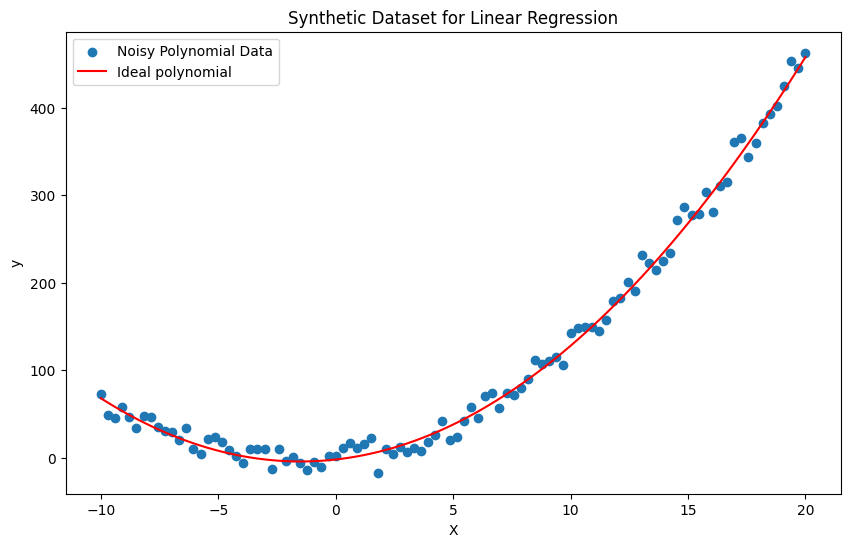

In [3]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Noisy Polynomial Data')
plt.plot(X, y_ideal, color='red', label='Ideal polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Synthetic Dataset for Linear Regression')
plt.show()


<h1> Model prediction: polynomial regression (second degree) </h1>

In [4]:
# Get features (X) and target (y) variables
X = df[['X']]
y = df[['y']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Initialize the model
# 1) PolynomialFeatures(degree): generates new features by raising the existing features (only x) to the power of the specified degree. The transformed features will include x, x^2. This helps the model capture nonlinear relationships in the data. 
# 2) Then, a Multiple Linear Regression can be applied and will take each x^i as a different variable / feature.

model = LinearRegression()
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [6]:
# Extract intermediate state after applying PolynomialFeatures
X_train_poly = model.named_steps['polynomialfeatures'].transform(X_train)
print("Original Features:")
print(X_train[:5])
print("\nTransformed Features:") # First column: x^0, second column: x^1, third column: x^2
print(X_train_poly[:5])

Original Features:
            X
14  -5.757576
52   5.757576
34   0.303030
92  17.878788
83  15.151515

Transformed Features:
[[ 1.00000000e+00 -5.75757576e+00  3.31496786e+01]
 [ 1.00000000e+00  5.75757576e+00  3.31496786e+01]
 [ 1.00000000e+00  3.03030303e-01  9.18273646e-02]
 [ 1.00000000e+00  1.78787879e+01  3.19651056e+02]
 [ 1.00000000e+00  1.51515152e+01  2.29568411e+02]]


In [7]:
# Get the model parameters

linear_regression_model = model.named_steps['linearregression']

coefficients = linear_regression_model.coef_
intercept = linear_regression_model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Y intercept: {intercept}')

Coefficients: [[0.         3.02217448 0.9995944 ]]
Y intercept: [-0.51420802]


In [8]:
# Model evaluation

# MSE
# - possible values: >= 0
# - the smaller the better
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R-squared: 
# - possible values: [0, 1] interval
# - the higher (closer to 1) the better
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


Mean Squared Error: 118.18971328733433
R-squared: 0.9916896761393736


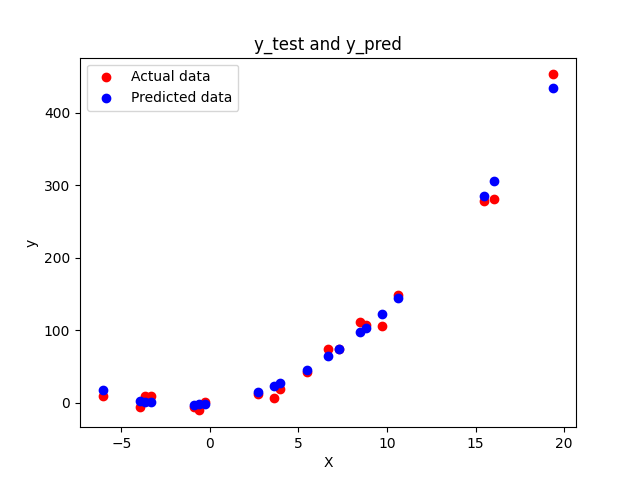

In [9]:
# Visualize predictions and actual values in original feature space

%matplotlib widget
plt.figure()
plt.scatter(X_test, y_test, label='Actual data', c='r')
plt.scatter(X_test, y_pred, label='Predicted data', c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('y_test and y_pred')
plt.show()



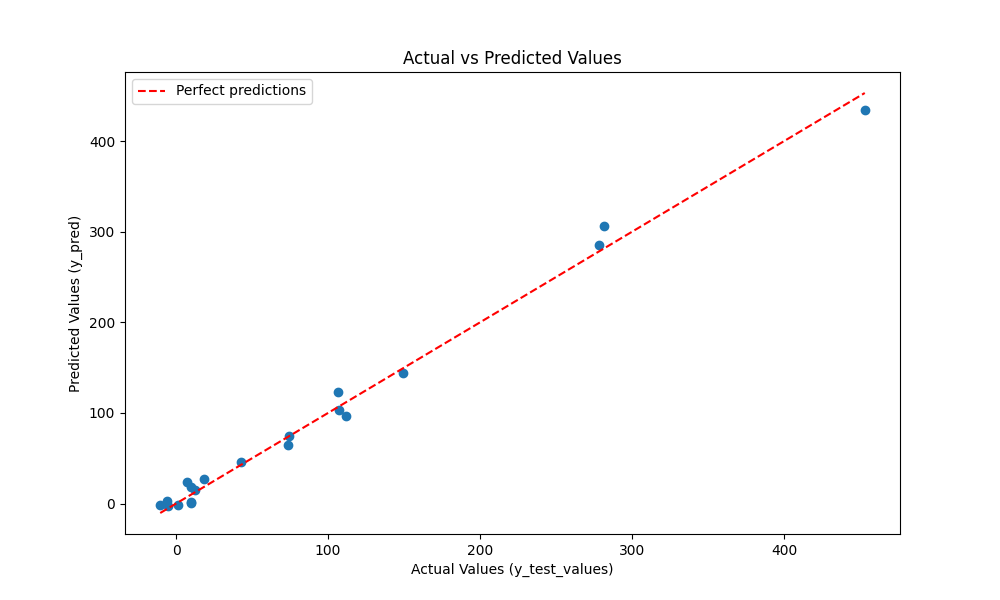

In [10]:
# Plot y_test (actual values) vs y_predicted

y_test_values = y_test['y'].values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_values, y_pred)
plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], linestyle='--', color='red', label='Perfect predictions')
plt.xlabel('Actual Values (y_test_values)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()